In [2]:
from bs4 import BeautifulSoup
import re
import codecs
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
import os

In [61]:
output_txt = 'digits_output.txt'
total_sites = 28026
path = '../content/'

with tqdm_notebook(total=total_sites) as pbar:
    with open(output_txt, 'w') as out_f:
        out_f.write('{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\n'.format('doc_id', 'number_cntr', 'year_psbl', \
                                                          'near_year_psbl', 'useful_num_ratio', \
                                                          'long_numbers', 'long_num_ratio', \
                                                          'short_numbers', 'numbers'))
        for doc_id in range(1,total_sites+1):
            with open(path + str(doc_id) + ".dat",'r') as in_f:
            
                soup = BeautifulSoup(in_f, 'html.parser')
                numbers = ' '.join([i for i in re.findall(r'\d+', soup.text)])
                number_cntr = len(re.findall(r'[0-9]+', soup.text))
                year_psbl = len(re.findall(r'[1-2][0-9][0-9][0-9]', soup.text))
                near_year_psbl = len(re.findall(r'20[0-2][0-9]', soup.text))
                long_numbers = len(re.findall(r'\D[0-9]{5,}\D', soup.text))
                if number_cntr != 0:
                    useful_num_ratio = near_year_psbl / number_cntr
                    long_num_ratio = long_numbers / number_cntr
                else:
                    useful_num_ratio = 0.
                    long_num_ratio = 0.
                short_numbers = len(re.findall(r'\D[0-9]{1,3}\D', soup.text))
#                 print()

#                 print(re.findall(r'[0-9]{1,3}', soup.text))

                out_f.write('{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\n'.format(doc_id, number_cntr, year_psbl, \
                                                                    near_year_psbl, useful_num_ratio, \
                                                                    long_numbers, long_num_ratio, \
                                                                    short_numbers, numbers))
                pbar.update()

In [95]:
df = pd.read_csv(output_txt, sep='\t', encoding='utf-8', lineterminator='\n')
# df['useful_num_ratio'] = df['near_year_psbl'] / df['number_cntr']
df.head()

,doc_id,number_cntr,year_psbl,near_year_psbl,useful_num_ratio,long_numbers,long_num_ratio,short_numbers,numbers
0,1,233,10,3,0.012876,0,0.000000,155,5141 260 22 12 02 2013 260 22 1 29 8 1 5 530 6...
1,2,33,9,1,0.030303,6,0.181818,25,100 960 10 0 14 17 1 800 5591742745017420 2547...
2,3,896,202,7,0.007812,18,0.020089,611,13 319 1 760 570 0 0 640 480 0 20 20 50 50 20 ...
3,4,349,24,8,0.022923,4,0.011461,299,95 6 280 3313230 0 1 1 2 3 21 228 23 73 91 60 ...
4,5,594,38,32,0.053872,4,0.006734,411,4 1 0 0 0 1 80 0 0 4 0 1 8 0 5 1 80 0 5 1 86 0...


In [96]:
df.describe()

,doc_id,number_cntr,year_psbl,near_year_psbl,useful_num_ratio,long_numbers,long_num_ratio,short_numbers
count,28026.000000,28026.000000,28026.000000,28026.000000,28026.000000,28026.000000,28026.000000,28026.000000
mean,14013.500000,1143.302683,144.843253,51.788875,0.055424,65.232998,0.064647,743.631235
std,8090.553658,3499.292862,499.418377,226.082903,0.064828,441.259774,0.062924,2116.938610
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7007.250000,168.000000,14.000000,3.000000,0.010450,6.000000,0.020000,111.000000
50%,14013.500000,368.000000,36.000000,11.000000,0.030837,16.000000,0.045918,243.000000
75%,21019.750000,1007.000000,101.000000,38.000000,0.079861,38.000000,0.090909,667.000000
max,28026.000000,141087.000000,28445.000000,12921.000000,1.000000,58578.000000,1.000000,82164.000000


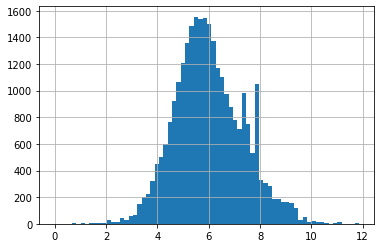

In [97]:
df['log_number_cntr'] = df.number_cntr.apply(lambda x: np.log(1+x))
df.log_number_cntr.hist(bins=70)

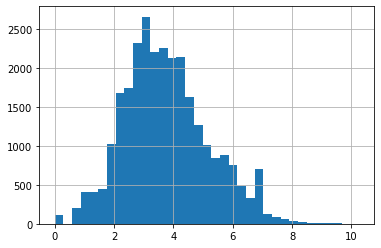

In [98]:
df['log_year_psbl'] = df.year_psbl.apply(lambda x: np.log(1+x))
df.log_year_psbl.hist(bins=35)

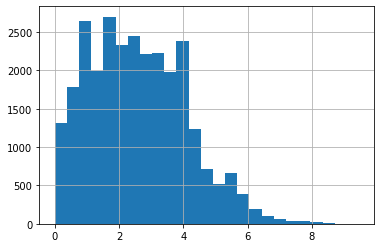

In [99]:
df['log_near_year_psbl'] = df.near_year_psbl.apply(lambda x: np.log(1+x))
df.log_near_year_psbl.hist(bins=25)

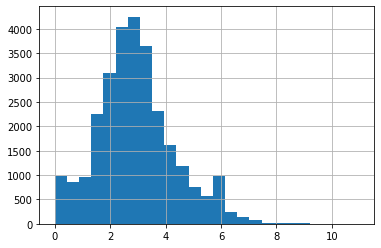

In [100]:
df['log_long_numbers'] = df.long_numbers.apply(lambda x: np.log(1+x))
df.log_long_numbers.hist(bins=25)

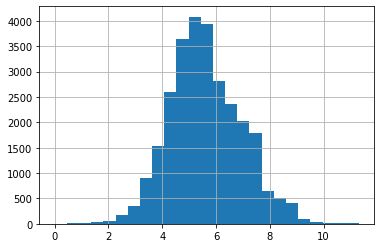

In [101]:
df['log_short_numbers'] = df.short_numbers.apply(lambda x: np.log(1+x))
df.log_short_numbers.hist(bins=25)

In [104]:
df[['doc_id', 'numbers']].to_csv("digits_output_numbers.txt", index=False, sep='\t')
df = df.drop(labels=['numbers'], axis=1)
df.to_csv("digits_output_statistics.txt", index=False, sep='\t')

In [117]:
nimg_df = pd.read_csv('digits_output_statistics.txt', sep='\t', encoding='utf-8', lineterminator='\n')

In [118]:
group_df = pd.read_csv('../train_groups.csv', sep=',', encoding='utf-8', lineterminator='\n')
group_df = group_df[['doc_id', 'group_id']]
group_df.index = group_df.doc_id
group_df.drop('doc_id', inplace=True, axis=1)
group_df = group_df.sort_index()
nimg_df = pd.merge(nimg_df, group_df, on='doc_id', how='left')
nimg_df = nimg_df.dropna()
nimg_df.describe()

,doc_id,number_cntr,year_psbl,near_year_psbl,useful_num_ratio,long_numbers,long_num_ratio,short_numbers,log_number_cntr,log_year_psbl,log_near_year_psbl,log_long_numbers,log_short_numbers,group_id
count,11690.000000,11690.000000,11690.000000,11690.000000,11690.000000,11690.000000,11690.000000,11690.000000,11690.000000,11690.000000,11690.000000,11690.000000,11690.000000,11690.000000
mean,13834.891873,1124.654919,154.649102,55.258597,0.055908,70.189393,0.064579,717.963986,6.020916,3.769110,2.606566,2.903085,5.600226,65.321386
std,8412.887536,3333.578572,593.767327,258.761845,0.065149,621.892284,0.063112,1884.771850,1.334001,1.462863,1.516017,1.417094,1.326292,37.096226
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6477.250000,166.000000,14.000000,3.000000,0.010695,6.000000,0.020045,108.000000,5.117994,2.708050,1.386294,1.945910,4.691348,33.000000
50%,13568.500000,364.000000,36.000000,11.000000,0.031348,15.000000,0.045818,239.000000,5.899897,3.610918,2.484907,2.772589,5.480639,66.000000
75%,21550.250000,993.750000,102.000000,38.000000,0.079646,37.000000,0.090909,651.750000,6.902491,4.634729,3.663562,3.637586,6.481194,98.000000
max,28025.000000,129460.000000,28445.000000,10763.000000,0.901961,58578.000000,0.958678,77375.000000,11.771135,10.255763,9.283963,10.978132,11.256432,129.000000


In [119]:
nimg_df[['doc_id', 'number_cntr']].to_csv("number_cntr_train.csv", index=False)